This project involved analzying the 2020 Chicago taxi dataset using the Crisp-dm process consisting of:

•	Business Understanding

•	Data Understanding

•	Prepare Data

•	Data Modeling

•	Evaluate the Results

•	Deploy


# BUSINESS UNDERSTANDING

When surveying the internet for different datasets to analyze, it was interesting to come across the Chicago data portal that stored a wide variety of datasets relating to the city. The data that interested me most in this portal was the data logging taxi trips taken across the city. Each recent calendar year has a full dataset with records of the distinct taxi trips taken through the year with details such as the time and date of the trip, fare, tip paid, company used, pick up and drop off community area. I decided to explore the 2020 calendar year dataset while pairing it with income, population, and square area datasets for the different community areas sourced from other sites. The three questions I decided to explore are:

•	With 2020 as a transition year due to COVID-19, what were the general trends in taxi usage through the year?

•	On some trips a tip was paid while on many others a tip was not. What general factors in the dataset relate to whether a tip is paid?

•	With the median household income, population, and area data on the community areas in the additional datasets, how do these factors relate to the frequency of taxi trips in the different community areas?


# DATA UNDERSTANDING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from datetime import timedelta
import numpy as np

In [2]:
# Load the three datasets

# Data recording the taxi trips in chicago in 2020
df_trip = pd.read_csv('chicago_taxi_2020.csv')

# Dataset the list the community areas by name, number, population and area
df_loc = pd.read_csv('chicago_communities.csv')

# Dataset that records the median household incomes in the different chicago communities
df_income = pd.read_csv('chicago_income.csv')

C:\Users\kkimani2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_trip.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,16c7456d99031528c238bd02f40df5ab9bdf9778,88d3be8c1334607f62a8c058f680dd7fbb57826ec7408d...,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,60,0.00,NaN,NaN,NaN,NaN,...,9.0,12.27,Credit Card,Top Cab Affiliation,NaN,NaN,NaN,NaN,NaN,NaN
1,472eef1d5c7a5e5ee033f673942f367dc71869f1,199fa05b63204aa1c620c161c5cebe43b0909b1ee99864...,01/01/2020 12:00:00 AM,01/01/2020 12:30:00 AM,"1,740",0.00,NaN,NaN,NaN,43.0,...,0.0,13.00,Cash,Blue Ribbon Taxi Association Inc.,NaN,NaN,NaN,41.761578,-87.572782,POINT (-87.5727819867 41.7615779081)
2,031a4d882fb3315a490d0b5c358c945ad9b9856d,aabecb47e958f99860a3b4d01f14d53644ac26126d9519...,01/01/2020 12:00:00 AM,01/01/2020 12:15:00 AM,720,0.70,NaN,NaN,8.0,8.0,...,5.0,14.80,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,3c416c246829dfb3f78cc93cbc7dfecdd379be15,ba106251fbb2b52177138ccbb8a1327a83c89470c240b2...,01/01/2020 12:00:00 AM,01/01/2020 12:15:00 AM,720,0.80,NaN,NaN,8.0,8.0,...,2.0,9.75,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
4,3c0a22971ae070ce35e0c03f1b8e92fe7aa840cd,1f1970d8e52c7e2575aeb68eb3b6ab0e21c77b728267df...,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,556,0.77,NaN,NaN,8.0,8.0,...,0.0,6.75,Cash,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)


In [4]:
df_loc.head()

,No.,Name,Population (2020)[update][10],Area[9] (sq mi.),Area[9] (km2),Density (/sq mi.),Density (/km2)
0,1,Rogers Park,"55,628",1.84,4.77,"30,232.61","11,672.81"
1,2,West Ridge,"77,122",3.53,9.14,"21,847.59","8,435.36"
2,3,Uptown,"57,182",2.32,6.01,"24,647.41","9,516.37"
3,4,Lincoln Square,"40,494",2.56,6.63,"15,817.97","6,107.32"
4,5,North Center,"35,114",2.05,5.31,"17,128.78","6,613.42"


In [5]:
df_income.head()

,Neighborhood,Median household Income
0,City of Chicago,"$38,625.00"
1,Albany Park,"$40,711.00"
2,Archer Heights,"$39,431.00"
3,Armour Square,"$22,756.00"
4,Ashburn,"$53,633.00"


# QUESTION 1 - TRENDS DURING THE YEAR

In [6]:
df_trip.shape

(3889032, 23)

In [7]:
df_trip.isnull().sum()

Trip ID                             0
Taxi ID                           201
Trip Start Timestamp                0
Trip End Timestamp                574
Trip Seconds                     1549
Trip Miles                         30
Pickup Census Tract           2106125
Dropoff Census Tract          2118598
Pickup Community Area          278916
Dropoff Community Area         368829
Fare                              332
Tips                              332
Tolls                             332
Extras                            332
Trip Total                        332
Payment Type                        0
Company                             0
Pickup Centroid Latitude       278214
Pickup Centroid Longitude      278214
Pickup Centroid Location       278214
Dropoff Centroid Latitude      362119
Dropoff Centroid Longitude     362119
Dropoff Centroid  Location     362119
dtype: int64

In [8]:
df_trip.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                   object
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                           object
Tips                          float64
Tolls                         float64
Extras                         object
Trip Total                     object
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [9]:
# The trip start date needs to be converted into a pandas datetime type

df_trip['trip_date'] = pd.to_datetime(df_trip['Trip Start Timestamp']).dt.date


In [10]:
# The fare needs to be numeric. The comma in the values needs to first be removed 

df_trip['Fare'] = df_trip['Fare'].apply(lambda x: float(str(x).replace(',','')))

In [11]:
""" Longer trips should have higher fares so unitize the fare per mile to get a representation of taxi expensiveness 
  For very short trips I assume the miles were 0 for rounding, convert the fare rate to Null as unknown rather than infinity """

df_trip['Fare_per_mile'] = (df_trip['Fare']/df_trip['Trip Miles']).replace([np.inf, -np.inf], np.nan)

In [12]:
df_trip['Fare_per_mile'].describe()

count    3.266948e+06
mean     1.363337e+01
std      3.598593e+02
min      0.000000e+00
25%      3.153670e+00
50%      4.907975e+00
75%      7.094595e+00
max      9.700480e+04
Name: Fare_per_mile, dtype: float64

In [13]:
# Have a binary indicator of whether a tip was paid. For cases where Tips is missing, set tip paid as missing

df_trip['tip_paid'] = (df_trip['Tips'] > 0 ).astype('int')
df_trip.loc[df_trip['Tips'].isnull(), 'tip_paid'] = None

In [14]:
df_trip.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'trip_date', 'Fare_per_mile', 'tip_paid'],
      dtype='object')

In [15]:
# I will aggregate the variables on daily basis to explore trends over the year

aggs = {'Trip Miles': 'mean', 'Fare_per_mile': 'mean', 'tip_paid': 'mean', 'Trip ID': lambda x: x.nunique()}
# Aggregation functions to use for the columns
# These aggregation functions used ignore missing values which is desirable as no need to treat them

daily_agg = df_trip.groupby('trip_date').aggregate(aggs)
daily_agg.columns = ['Average_trip_distance', 'Average_fare_per_mile', 'Tip_rate', 'Number_of_trips']
daily_agg.head()

,Average_trip_distance,Average_fare_per_mile,Tip_rate,Number_of_trips
trip_date,,,,
2020-01-01,3.556229,12.370987,0.378384,20799
2020-01-02,3.200906,13.507563,0.373798,26304
2020-01-03,2.918353,10.193138,0.380451,30799
2020-01-04,3.570456,10.898934,0.353550,21173
2020-01-05,4.970807,10.660725,0.393630,17710


In [16]:

def plotline(var, xlabel, ylabel, title):
    
    """ 
    Function to plot a line chart that will be replotted a few times for different variables.
    Takes the variable to plot, x-label, y-label and plot title as inputs. 
    The function then plots a line chart of the variable across the year
    """
    
    startmonths = list(map(lambda x: x + timedelta(days = 1), pd.date_range('2019-12-31', periods = 12, freq = 'M')))
    fig, ax = plt.subplots(figsize=(20,10))
    ax.grid(axis='both')
    plt.xticks(startmonths, list(map(lambda x:x.strftime('%B-%d'), startmonths)))
    ax.plot(daily_agg[var])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


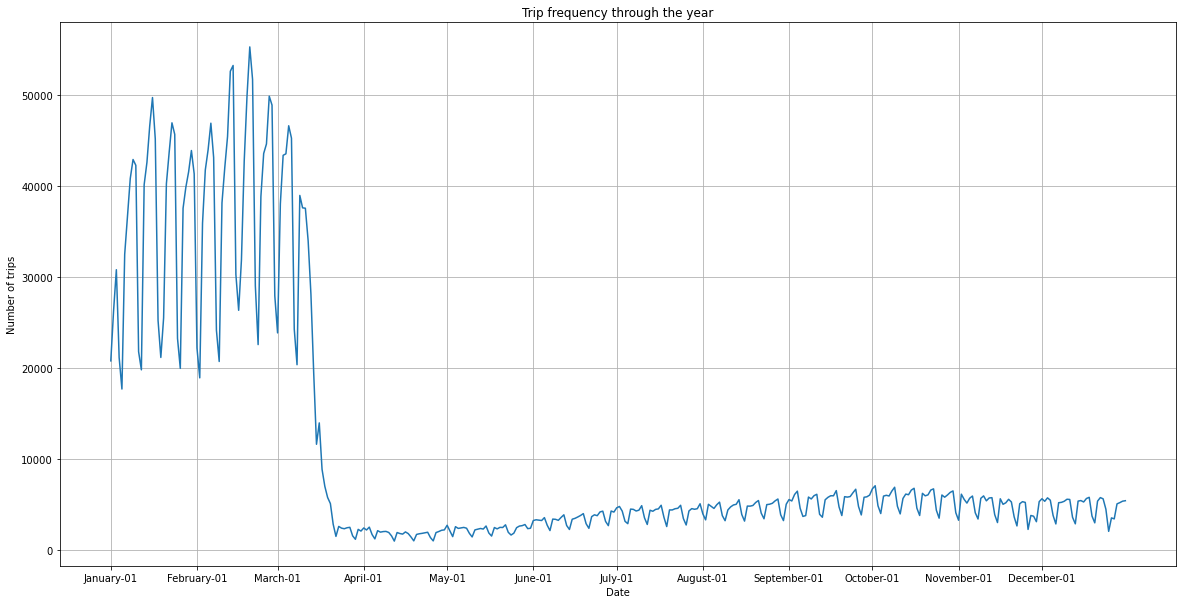

In [17]:
plotline('Number_of_trips', 'Date', 'Number of trips', 'Trip frequency through the year')



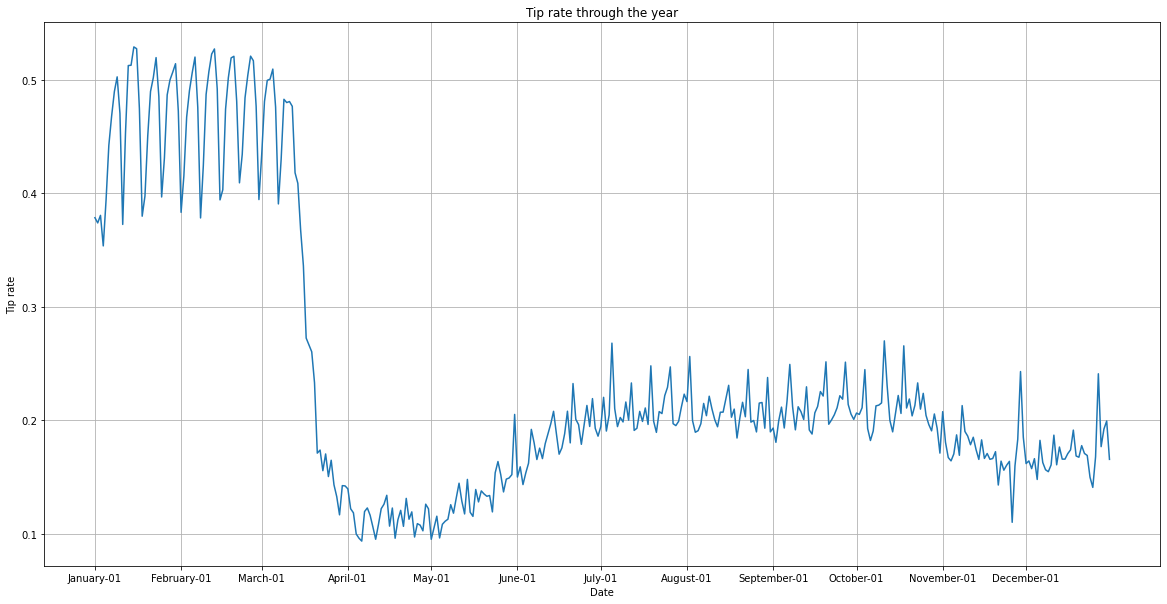

In [18]:
plotline('Tip_rate', 'Date', 'Tip rate', 'Tip rate through the year')



Text(0.5, 1.0, 'Average tip amount through the year')

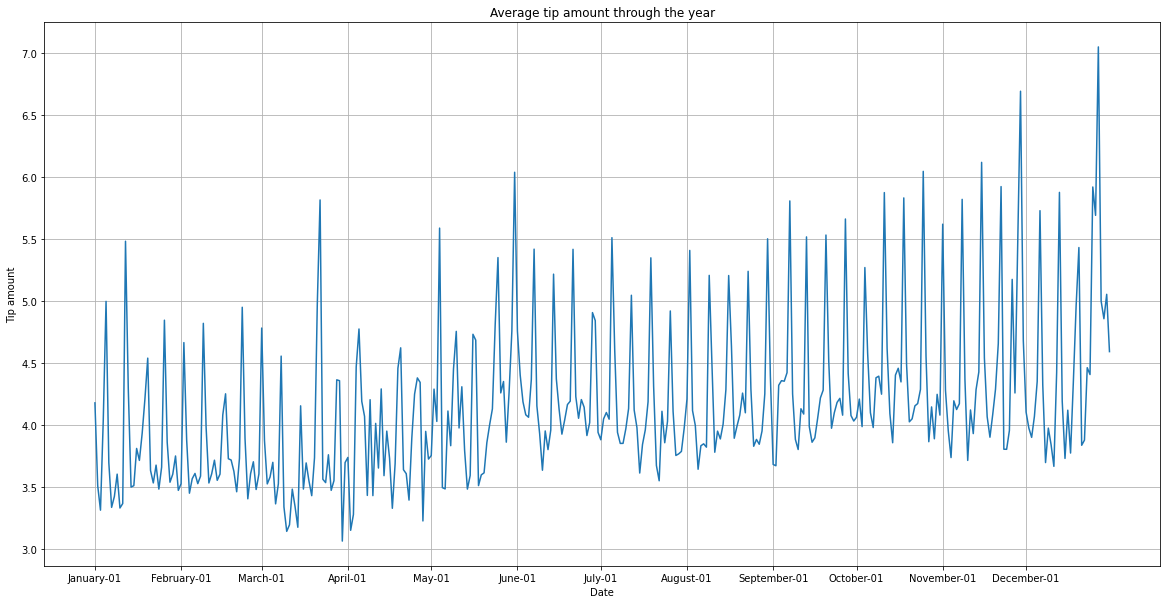

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.grid(axis='both')
startmonths = list(map(lambda x: x + timedelta(days = 1), pd.date_range('2019-12-31', periods = 12, freq = 'M')))
plt.xticks(startmonths, list(map(lambda x:x.strftime('%B-%d'), startmonths)))
ax.plot(df_trip[df_trip['Tips'] > 0].groupby('trip_date')['Tips'].mean())  # daily average tip given tip has been paid
ax.set_xlabel('Date')
ax.set_ylabel('Tip amount')
ax.set_title('Average tip amount through the year')


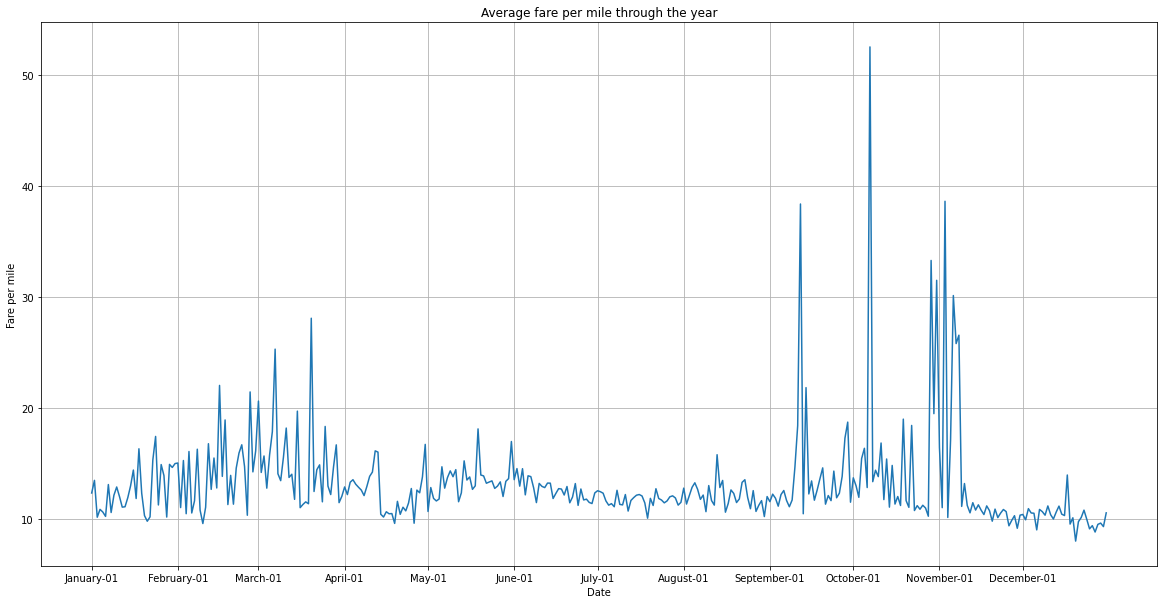

In [20]:
plotline('Average_fare_per_mile', 'Date', 'Fare per mile', 'Average fare per mile through the year')

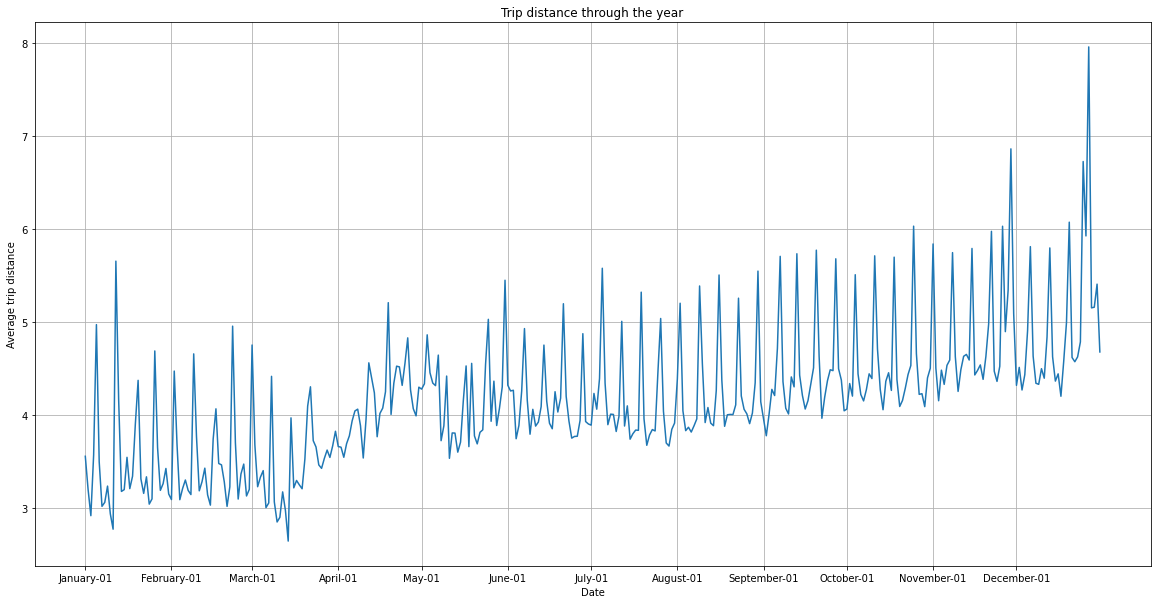

In [21]:
plotline('Average_trip_distance', 'Date', 'Average trip distance', 'Trip distance through the year')

# QUESTION 2 - FACTORS THAT DETERMINE TIP RATE

In [22]:
df_trip['tip_paid'].mean()

0.38693393679121557

In [23]:
""" Would like to explore tip rate relation with the time of day and week
, and interaction with the period in relation to covid lockdowns """


df_trip['Trip_start_hour'] = pd.to_datetime(df_trip['Trip Start Timestamp']).apply(lambda x: x.strftime('%H'))
df_trip['Trip_day_of_week'] = df_trip['trip_date'].apply(lambda x: x.strftime('%A'))
df_trip['Pre-lockdown'] = df_trip['trip_date'].apply(lambda x: int(x.strftime('%m'))) < 3



Text(0.5, 1.0, 'Tip rate based on hour of day')

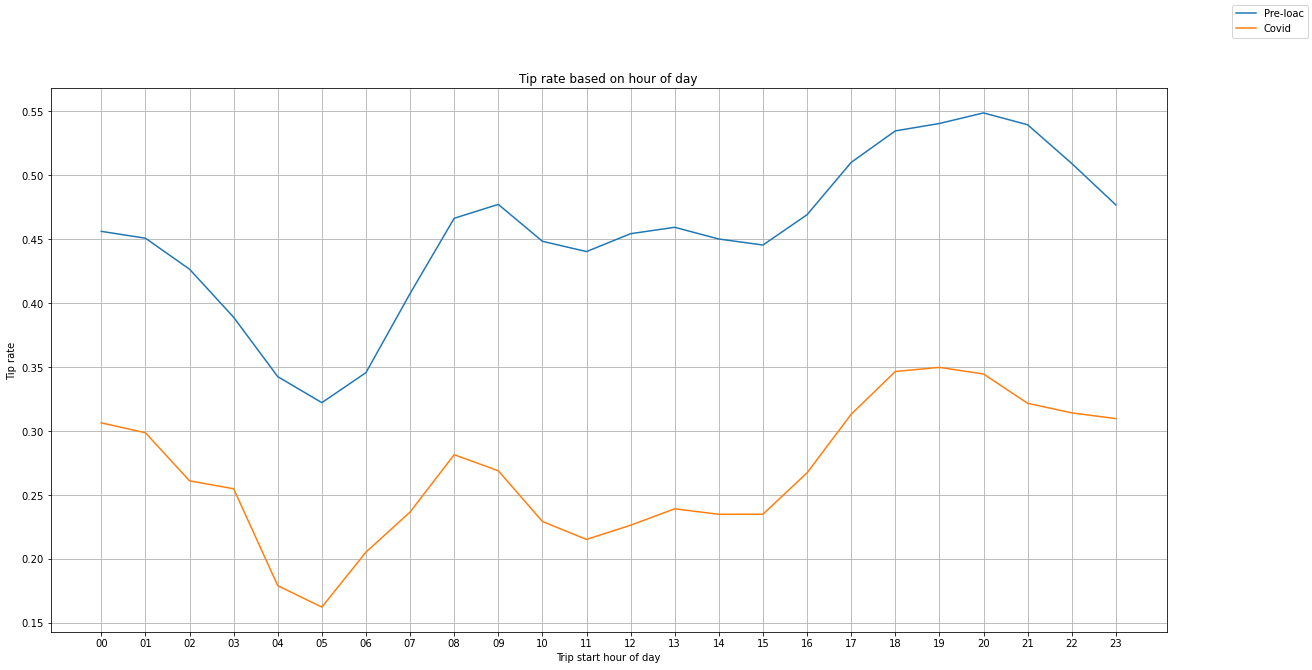

In [24]:
# Plot to see how hour of day affects the chances of a tip being paid

hour_tip_rate = df_trip.groupby(['Trip_start_hour', 'Pre-lockdown'])['tip_paid'].mean().reset_index()

fig, ax = plt.subplots(figsize=(20,10))
ax.grid(axis='both')
ax.plot(hour_tip_rate[hour_tip_rate['Pre-lockdown']]['Trip_start_hour'], hour_tip_rate[hour_tip_rate['Pre-lockdown']]['tip_paid'])
ax.plot(hour_tip_rate[~hour_tip_rate['Pre-lockdown']]['Trip_start_hour'], hour_tip_rate[~hour_tip_rate['Pre-lockdown']]['tip_paid'])
ax.set_xlabel('Trip start hour of day')
ax.set_ylabel('Tip rate')
fig.legend(labels = ('Pre-loac','Covid'), fontsize=10)
ax.set_title('Tip rate based on hour of day')


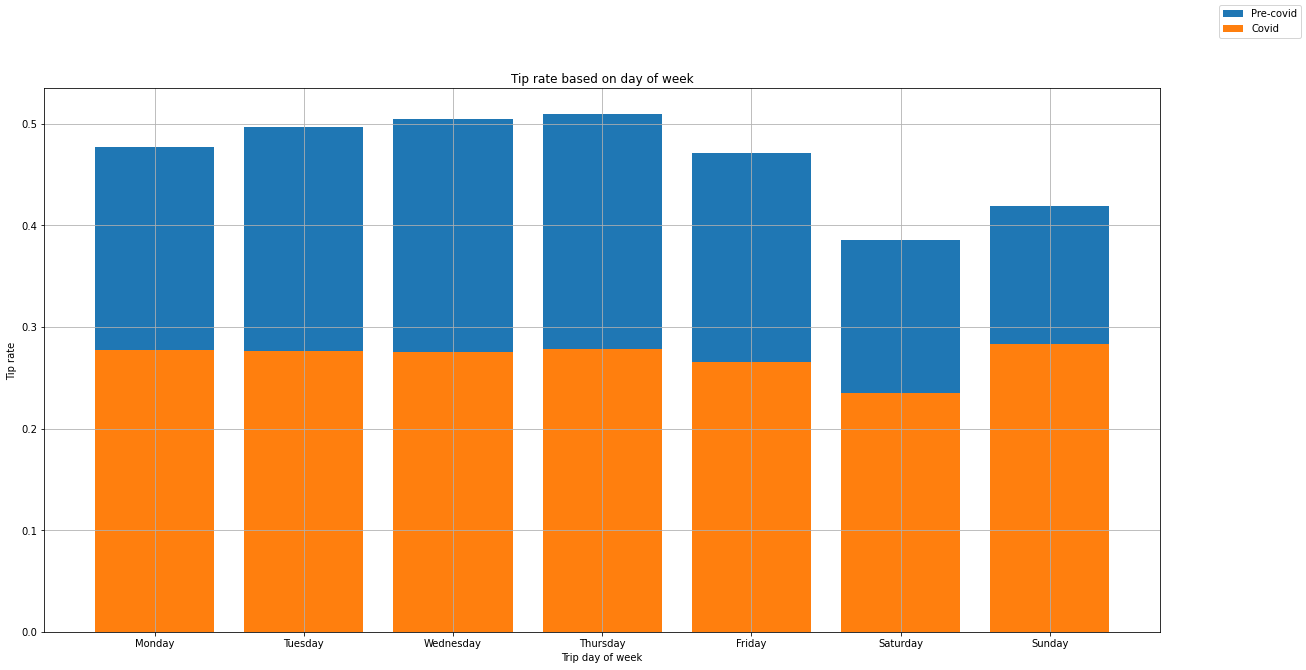

In [25]:
# Plot to see how day of the week affects the chances of a tip being paid

daysofweek = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
weekday_tip_rate = df_trip.groupby(['Trip_day_of_week', 'Pre-lockdown'])['tip_paid'].mean().reset_index()
weekday_tip_rate.sort_values(by = 'Trip_day_of_week', key = lambda x: x.apply(lambda y: daysofweek[y]), inplace = True)

fig, ax = plt.subplots(figsize=(20,10))
ax.grid(axis='both')
ax.bar(weekday_tip_rate[weekday_tip_rate['Pre-lockdown']]['Trip_day_of_week'], weekday_tip_rate[weekday_tip_rate['Pre-lockdown']]['tip_paid'])
ax.bar(weekday_tip_rate[~weekday_tip_rate['Pre-lockdown']]['Trip_day_of_week'], weekday_tip_rate[~weekday_tip_rate['Pre-lockdown']]['tip_paid'])
ax.set_xlabel('Trip day of week')
ax.set_ylabel('Tip rate')
ax.set_title('Tip rate based on day of week')
fig.legend(labels = ('Pre-covid','Covid'), fontsize=10)

In [26]:
""" Would also like to see how the fare per mile affects tip rate.
Will visualize by binning fare per mile on observing tip rate across the bins"""

# 5 bins seems appropriate. First get the 20% quantile cutoffs to get idea of distribution before manually setting cuts

pd.qcut(df_trip['Fare_per_mile'], q = 5).value_counts()

(5.637, 7.857]      667535
(4.181, 5.637]      653459
(-0.001, 2.916]     653410
(2.916, 4.181]      653379
(7.857, 97004.8]    639165
Name: Fare_per_mile, dtype: int64

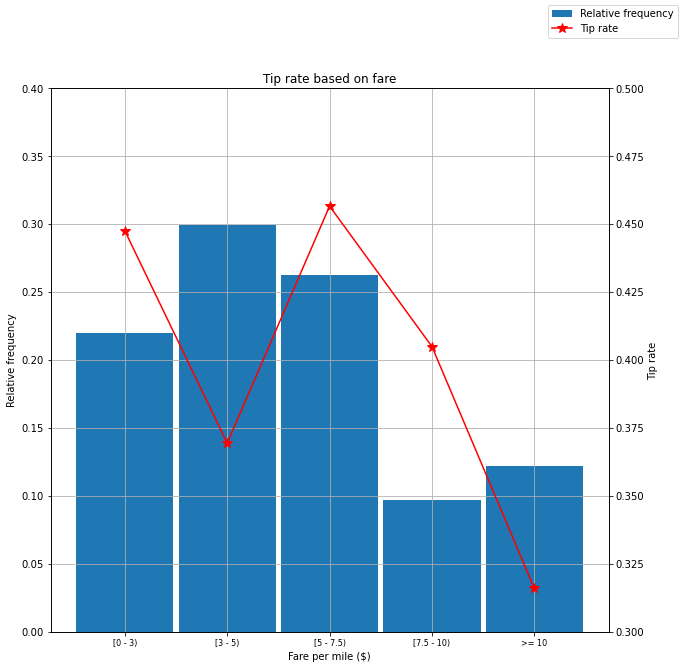

In [27]:
# Create plot with manually set bins for easier intepretation

lbls = ['[0 - 3)','[3 - 5)','[5 - 7.5)','[7.5 - 10)', '>= 10' ]
cuts = [-np.inf] + [3, 5, 7.5, 10] + [np.inf]

bins = pd.cut(df_trip['Fare_per_mile'], bins = cuts)

d = pd.DataFrame(df_trip.groupby(bins).tip_paid.agg(['mean', 'count', 'sum']))
d.columns = ['rate', 'freq', 'bads']
d['freq'] = d['freq']/d['freq'].sum()



fig, ax = plt.subplots(figsize=(10,10))
ax = d['freq'].plot(kind = 'bar', width = 0.95)
ax.set_ylabel('Relative frequency', fontsize=10)

ax2 = ax.twinx()
ax2 = d['rate'].plot(color = 'r', marker='*', markersize=10)
ax2.set_ylabel('Tip rate', fontsize=10)

ax.grid(axis='both')
ax.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax.set_ylim(0,0.4)
ax2.set_ylim(0.3,0.5)

ax.set_xlabel('Fare per mile ($)', fontsize=10)
ax.set_xticklabels(labels = lbls , rotation = 0, fontsize = 8)
ax.set_title('Tip rate based on fare')
fig.legend(labels = ('Relative frequency','Tip rate'), fontsize=10)
plt.show()

In [28]:
# Check the relation between the payment type and the tip rate. Simple table seems fine for this

paymenttype = df_trip.groupby('Payment Type').tip_paid.agg(['count', 'sum', 'mean'])
paymenttype.columns = ['Frequency used', 'Tips paid', 'Tip rate']
paymenttype

,Frequency used,Tips paid,Tip rate
Payment Type,,,
Cash,1894710,819.0,0.000432
Credit Card,1509491,1423662.0,0.943140
Dispute,2485,0.0,0.000000
Mobile,63992,62740.0,0.980435
No Charge,4957,195.0,0.039338
Prcard,239638,15548.0,0.064881
Prepaid,174,0.0,0.000000
Unknown,173253,1706.0,0.009847


In [29]:
# Check the tips rates in the different community areas

ca = pd.merge(left = df_trip, right = df_loc, left_on = 'Pickup Community Area', right_on = 'No.').groupby('Name').tip_paid.agg(['count', 'sum', 'mean'])
ca.columns = ['Trip frequency', 'Tips paid', 'Tip rate']
ca.sort_values(by = 'Tip rate', ascending = False)

,Trip frequency,Tips paid,Tip rate
Name,,,
O'Hare,308994,198357.0,0.641945
Garfield Ridge,62481,34346.0,0.549703
(The) Loop,858565,440491.0,0.513055
Near North Side,963436,404383.0,0.419730
Near West Side,422600,175050.0,0.414221
...,...,...,...
Ashburn,3915,90.0,0.022989
Washington Park,5631,123.0,0.021843
Pullman,3589,78.0,0.021733


# QUESTION 3 -  Population, median household income, and city size explain the frequency of use of taxi's within the cities

In [30]:
# First filter for where the pickup of droppoff community is same since looking at trips within then count trips

within_trips = df_trip[df_trip['Pickup Community Area'] == df_trip['Dropoff Community Area']].groupby('Pickup Community Area')['Trip ID'].nunique().reset_index()
within_trips.columns = ['Community area', 'Trip_count']
within_trips.head()

,Community area,Trip_count
0,1.0,10224
1,2.0,11539
2,3.0,22280
3,4.0,6186
4,5.0,2765


In [31]:
# Merge with the community information to get the name, poplulations and areas of the communities

within_trips = pd.merge(left = within_trips, right = df_loc, left_on = 'Community area', right_on = 'No.', how = 'left')
within_trips.columns

Index(['Community area', 'Trip_count', 'No.', 'Name',
       'Population (2020)[update][10]', 'Area[9] (sq mi.)', 'Area[9] (km2)',
       'Density (/sq mi.)', 'Density (/km2)'],
      dtype='object')

In [32]:
within_trips.head()

,Community area,Trip_count,No.,Name,Population (2020)[update][10],Area[9] (sq mi.),Area[9] (km2),Density (/sq mi.),Density (/km2)
0,1.0,10224,1,Rogers Park,"55,628",1.84,4.77,"30,232.61","11,672.81"
1,2.0,11539,2,West Ridge,"77,122",3.53,9.14,"21,847.59","8,435.36"
2,3.0,22280,3,Uptown,"57,182",2.32,6.01,"24,647.41","9,516.37"
3,4.0,6186,4,Lincoln Square,"40,494",2.56,6.63,"15,817.97","6,107.32"
4,5.0,2765,5,North Center,"35,114",2.05,5.31,"17,128.78","6,613.42"


In [33]:
# Select the columns I will keep

within_trips = within_trips[within_trips.columns[[3, 4, 6, 1]]]
within_trips.columns = ['Name', 'Population', 'Area', 'Trip_count']
within_trips.head()

,Name,Population,Area,Trip_count
0,Rogers Park,"55,628",4.77,10224
1,West Ridge,"77,122",9.14,11539
2,Uptown,"57,182",6.01,22280
3,Lincoln Square,"40,494",6.63,6186
4,North Center,"35,114",5.31,2765


In [34]:
# Merge with the neighborhood data to get the median incomes. Use left join as all trip data should be maintained

within_trips = within_trips.merge(df_income, left_on = 'Name', right_on = 'Neighborhood', how = 'left')
within_trips.head()

,Name,Population,Area,Trip_count,Neighborhood,Median household Income
0,Rogers Park,"55,628",4.77,10224,Rogers Park,"$31,602.00"
1,West Ridge,"77,122",9.14,11539,West Ridge,"$41,144.00"
2,Uptown,"57,182",6.01,22280,Uptown,"$32,328.00"
3,Lincoln Square,"40,494",6.63,6186,Lincoln Square,"$40,898.00"
4,North Center,"35,114",5.31,2765,North Center,"$51,758.00"


In [35]:
# Check if any name did not find a match in neighborhood dataset

within_trips[within_trips['Median household Income'].isnull()]

,Name,Population,Area,Trip_count,Neighborhood,Median household Income
31,(The) Loop,"42,298",4.27,249607,NaN,NaN


In [36]:
# The "(The)" is likely to be the issue. Check if any neighborhood name contains the "Loop" name
df_income[df_income['Neighborhood'].str.contains('Loop')]

,Neighborhood,Median household Income
42,Loop,"$65,128.00"


In [37]:
# From above, match can be made by removing the "(The)" but since just one, it is simpler to just fillna with the income value

within_trips['Median household Income'].fillna(df_income[df_income['Neighborhood'].str.contains('Loop')].iloc[0, 1], inplace = True)
within_trips[within_trips['Name'].str.contains('Loop')]

,Name,Population,Area,Trip_count,Neighborhood,Median household Income
31,(The) Loop,"42,298",4.27,249607,NaN,"$65,128.00"


In [38]:
within_trips.columns

Index(['Name', 'Population', 'Area', 'Trip_count', 'Neighborhood',
       'Median household Income'],
      dtype='object')

In [39]:
# Select and name final columns

within_trips = within_trips[within_trips.columns[[0,1,2,5,3]]]
within_trips.columns = ['Name','Population', 'Area', 'Income', 'Trip_count']
within_trips.head()

,Name,Population,Area,Income,Trip_count
0,Rogers Park,"55,628",4.77,"$31,602.00",10224
1,West Ridge,"77,122",9.14,"$41,144.00",11539
2,Uptown,"57,182",6.01,"$32,328.00",22280
3,Lincoln Square,"40,494",6.63,"$40,898.00",6186
4,North Center,"35,114",5.31,"$51,758.00",2765


In [40]:
# Check for any missing values

within_trips.isnull().sum()

Name          0
Population    0
Area          0
Income        0
Trip_count    0
dtype: int64

In [41]:
# Income needs to be numeric, need to clean by removing comma and dollar sign and convert to numeric

within_trips['Income'] = within_trips['Income'].apply(lambda x: float(str(x).replace(',','').replace('$','')))
within_trips.head()

,Name,Population,Area,Income,Trip_count
0,Rogers Park,"55,628",4.77,31602.0,10224
1,West Ridge,"77,122",9.14,41144.0,11539
2,Uptown,"57,182",6.01,32328.0,22280
3,Lincoln Square,"40,494",6.63,40898.0,6186
4,North Center,"35,114",5.31,51758.0,2765


In [42]:
# Similarly clean population

within_trips['Population'] = within_trips['Population'].apply(lambda x: float(str(x).replace(',',''))).astype('float')
within_trips.head()                 

,Name,Population,Area,Income,Trip_count
0,Rogers Park,55628.0,4.77,31602.0,10224
1,West Ridge,77122.0,9.14,41144.0,11539
2,Uptown,57182.0,6.01,32328.0,22280
3,Lincoln Square,40494.0,6.63,40898.0,6186
4,North Center,35114.0,5.31,51758.0,2765


In [43]:
# Observe correlations. Since few variables, table is enough for quick understanding without heatmap

within_trips.corr()

,Population,Area,Income,Trip_count
Population,1.000000,0.233576,0.199829,0.387981
Area,0.233576,1.000000,0.102106,0.010215
Income,0.199829,0.102106,1.000000,0.279965
Trip_count,0.387981,0.010215,0.279965,1.000000


In [44]:
def plotscatter(xvar, yvar, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.grid(axis='both')
    
    global within_trips
    
    x = within_trips[xvar]
    y = within_trips[yvar]

    a, b = np.polyfit(x, y, 1)
    ax.scatter(x, y)
    ax.plot(x, a*x+b)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    

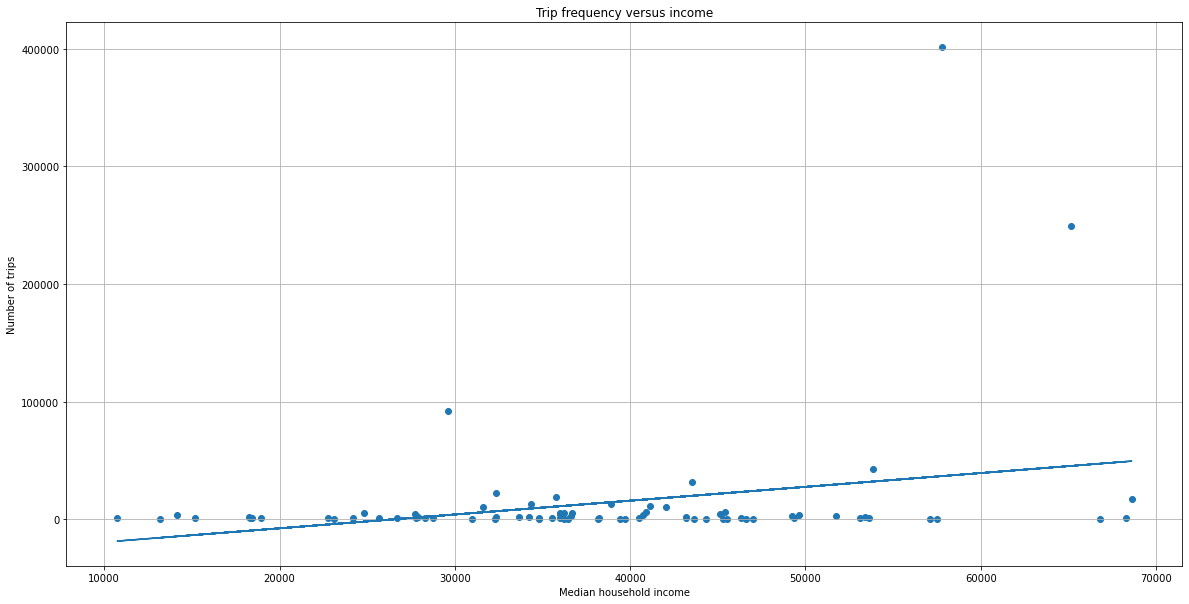

In [45]:
# Plot scatter plot to see one-to-one relation between trip frequency and income 

plotscatter('Income', 'Trip_count', 'Median household income', 'Number of trips', 'Trip frequency versus income')


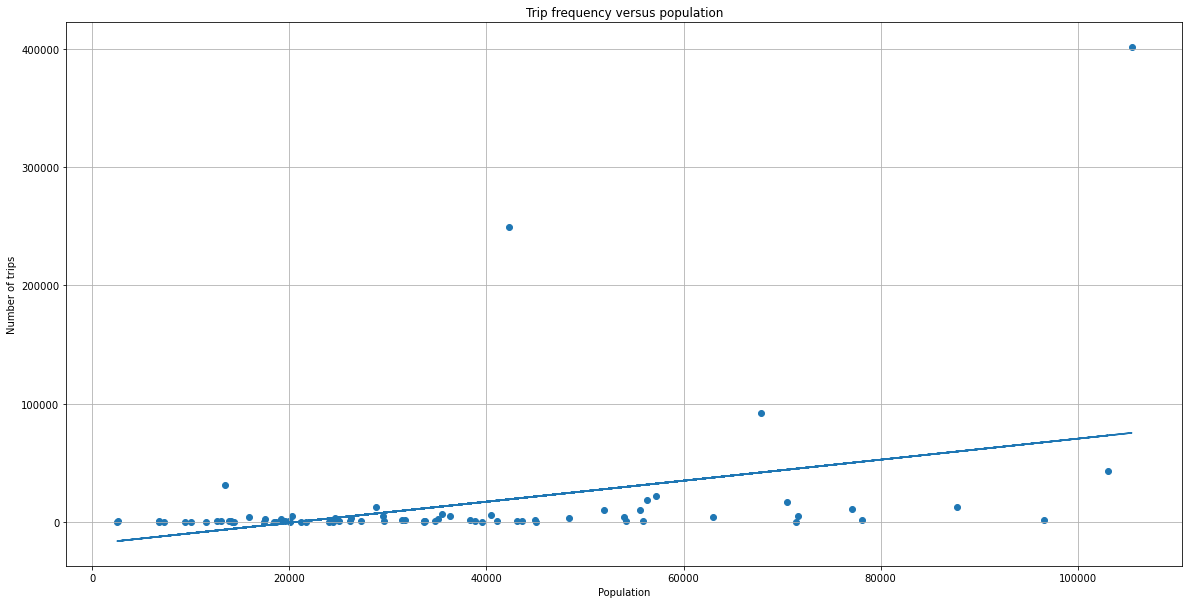

In [46]:
# Plot scatter plot to see one-to-one relation between trip frequency and population

plotscatter('Population', 'Trip_count', 'Population', 'Number of trips', 'Trip frequency versus population')


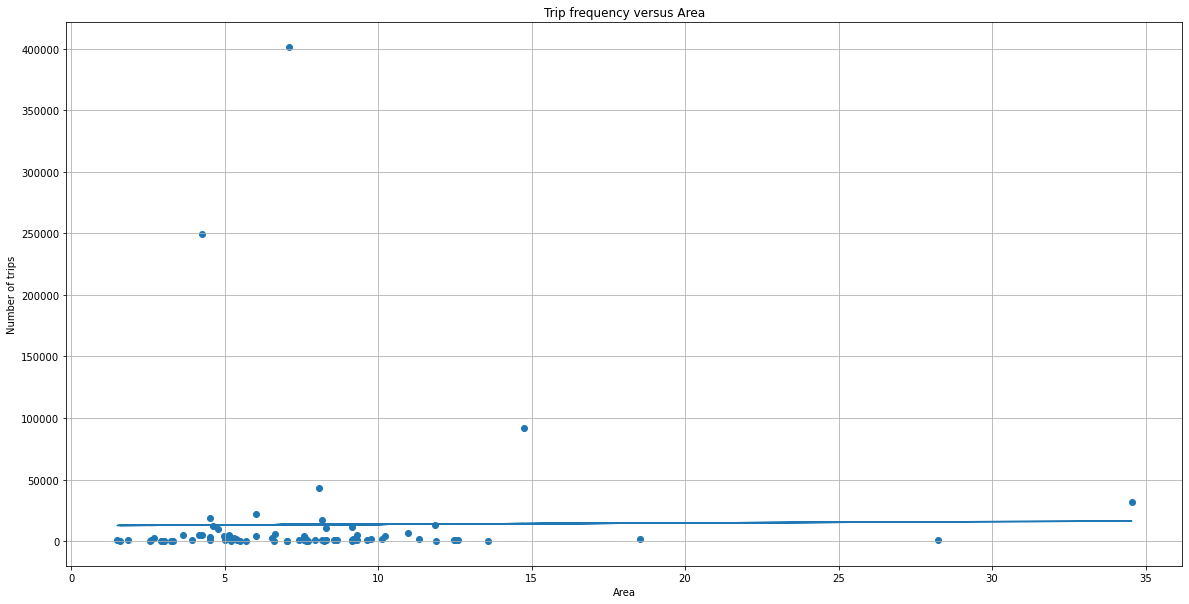

In [47]:
# Plot to see one-to-one relation between trip frequency and are
plotscatter('Area', 'Trip_count', 'Area', 'Number of trips', 'Trip frequency versus Area')




In [48]:
within_trips.head()

,Name,Population,Area,Income,Trip_count
0,Rogers Park,55628.0,4.77,31602.0,10224
1,West Ridge,77122.0,9.14,41144.0,11539
2,Uptown,57182.0,6.01,32328.0,22280
3,Lincoln Square,40494.0,6.63,40898.0,6186
4,North Center,35114.0,5.31,51758.0,2765


In [49]:
# Fit regression to see the explainabilty of the variables and also the relationships when holding others constant (coefficients)
x = within_trips[['Population', 'Area', 'Income']]
y = within_trips['Trip_count']

model = LinearRegression(fit_intercept=False)
model.fit(x, y)


LinearRegression(fit_intercept=False)

In [50]:
# Get the R^2 on train data. Test not used as this is to see the linear relationships on the given data only

model.score(x, y)

0.14795252201748288

In [51]:
# Get the coefficients

list(map(lambda x: float(x), model.coef_))

[0.7290886194696895, -1815.7785210906366, 0.13652291831780253]